Exploratory SP

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.fft import fft, ifft
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA 


In [3]:
def fftPlot(y):
    
    # get the list of frequencies
    frequency = np.linspace(0,1,np.size(y))

    # get the list of spectrums
    spectrum=abs(fft(y))**2
    normalized_spectrum=spectrum/spectrum[0]

    # plot nspectrum per frequency, with a semilog scale on nspectrum
    plt.semilogy(frequency,normalized_spectrum,marker='o',linewidth='2',color='k')

In [4]:
def decompPlot(df, col):
    
    y = df[col]
    
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(y, model='multiplicative', period=28)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(y, model='additive', period=28)

    # Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

In [5]:
def sleepTrendPlot(df, columns, period = 28):
    
#     fig, axs = plt.subplots(2, 2)
    for index, col in enumerate(columns):
        DecomposeResults = seasonal_decompose(df[col], model='multiplicative', period=28)
        ax = plt.subplot(2, 2, index + 1)
#         axs[index] = plt.plot(DecomposeResults.trend)
        plt.plot(DecomposeResults.trend)
#         plt.suptitle(col)
        

        # chart formatting
        ax.set_title(col)
#         ax.get_legend().remove()
        ax.set_xlabel("")  

In [6]:
def newNameColumn(column_name):
    return column_name.lower().split()[0]

In [7]:
def newNameColumn2(column_name):
    new_name = [column_name.lower().split()[0],column_name.lower().split()[1]]
    new_name = '_'.join(new_name)
    return new_name

In [8]:
def renameAllColumns(df):
    df_columns = df.columns
    updated_cols = [newNameColumn2(col) for col in df_columns[0:9]]
    updated_cols.extend([newNameColumn(col) for col in df_columns[9:13]])
    updated_cols.extend([newNameColumn2(col) for col in df_columns[13:16]])
    updated_cols.extend([newNameColumn(col) for col in df_columns[16::]])
    
    return {key: value for key, value in zip(df_columns, updated_cols)}

In [9]:
def renameSleepColumns(df_columns):
    updated_cols = [newNameColumn(col) for col in df_columns]
    return {key: value for key, value in zip(df_columns, updated_cols)}
    

In [10]:
def addPercentageColumns(df):
    cols = df.columns[9:13]
    for col in cols:
        df['_'.join([col,'percentage'])] = df[col]/df['in_bed']*100
    return df

def sleepPercentagePlot(df):
    
    df = addPercentageColumns(df)
    df.iloc[:,17::].plot(kind = 'bar', stacked = True)

    plt.axis('off')

    plt.show()


def sleepMeanPercentagePlot(df, bar_or_box):
    
    df = addPercentageColumns(df)
    if bar_or_box == 'bar': 
        sns.barplot(df.iloc[:,17::], orient = 'h')
    elif bar_or_box == 'box': 
        sns.barplot(df.iloc[:,17::], orient = 'h')

    plt.show()
    print(df.iloc[:,17::].mean(axis = 0))
    print(df.iloc[:,17::].std(axis = 0))
    print(df.iloc[:,17::].std(axis = 0)/df.iloc[:,17::].mean(axis = 0))

In [11]:
# read the sheet containing workout information excluding the comments, name of routine, and duration
df = pd.read_csv("sleeps.csv")

# rename columns to make them easier to work with
df = df.rename(columns=renameAllColumns(df))
df = df.dropna()

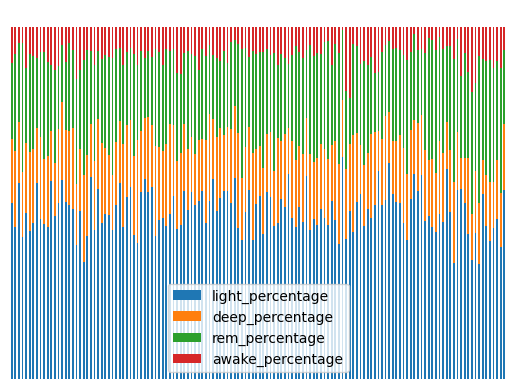

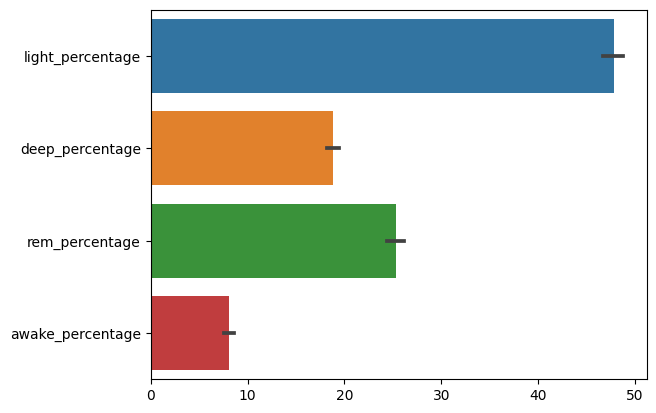

light_percentage    47.792536
deep_percentage     18.819199
rem_percentage      25.314320
awake_percentage     8.073945
dtype: float64
light_percentage    6.130139
deep_percentage     3.450260
rem_percentage      5.198467
awake_percentage    3.094477
dtype: float64
light_percentage    0.128266
deep_percentage     0.183337
rem_percentage      0.205357
awake_percentage    0.383267
dtype: float64


In [12]:
# df2 =  addPercentageColumns(df)
sleepPercentagePlot(df)
sleepMeanPercentagePlot(df, 'box')

In [13]:
# check for NA values
print(df.info())

# check the formatting for Sleep onset and Wake onset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 138
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_start        138 non-null    object 
 1   cycle_end          138 non-null    object 
 2   cycle_timezone     138 non-null    object 
 3   sleep_onset        138 non-null    object 
 4   wake_onset         138 non-null    object 
 5   sleep_performance  138 non-null    int64  
 6   respiratory_rate   138 non-null    float64
 7   asleep_duration    138 non-null    int64  
 8   in_bed             138 non-null    int64  
 9   light              138 non-null    int64  
 10  deep               138 non-null    int64  
 11  rem                138 non-null    int64  
 12  awake              138 non-null    int64  
 13  sleep_need         138 non-null    int64  
 14  sleep_debt         138 non-null    int64  
 15  sleep_efficiency   138 non-null    int64  
 16  nap                138 non-null

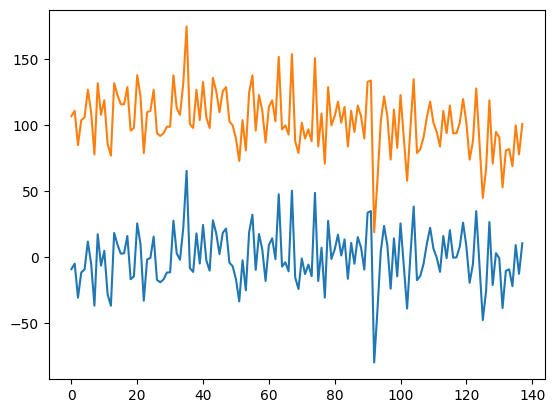

In [14]:
detrended = signal.detrend(df['deep'].values)
plt.plot(detrended)
plt.plot(df['deep'].values)

In [15]:
df.describe()

,sleep_performance,respiratory_rate,asleep_duration,in_bed,light,deep,rem,awake,sleep_need,sleep_debt,sleep_efficiency,light_percentage,deep_percentage,rem_percentage,awake_percentage
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,98.456522,13.468841,503.231884,547.579710,261.224638,103.246377,138.760870,44.347826,468.355072,2.927536,91.905797,47.792536,18.819199,25.314320,8.073945
std,8.179661,0.379358,54.295123,56.976985,41.536198,22.516762,31.901435,17.035666,12.582458,13.889889,2.912063,6.130139,3.450260,5.198467,3.094477
min,20.000000,12.300000,115.000000,116.000000,73.000000,19.000000,23.000000,1.000000,451.000000,0.000000,80.000000,32.765152,8.754864,13.259669,0.862069
25%,100.000000,13.200000,479.250000,525.000000,236.250000,90.000000,115.250000,34.000000,460.000000,0.000000,90.250000,43.412840,16.757722,21.321425,6.295482
50%,100.000000,13.500000,510.000000,551.000000,264.500000,102.000000,135.000000,41.500000,466.500000,0.000000,92.000000,47.679922,18.690908,24.904209,7.548041
75%,100.000000,13.700000,533.750000,571.750000,287.750000,118.000000,160.750000,53.750000,473.000000,0.000000,94.000000,52.563355,20.865434,28.579870,9.592396
max,100.000000,14.300000,583.000000,653.000000,357.000000,175.000000,220.000000,109.000000,566.000000,110.000000,98.000000,62.931034,29.118136,41.666667,20.073665


OptionError: No such keys(s): 'mode.use_inf_as_null'

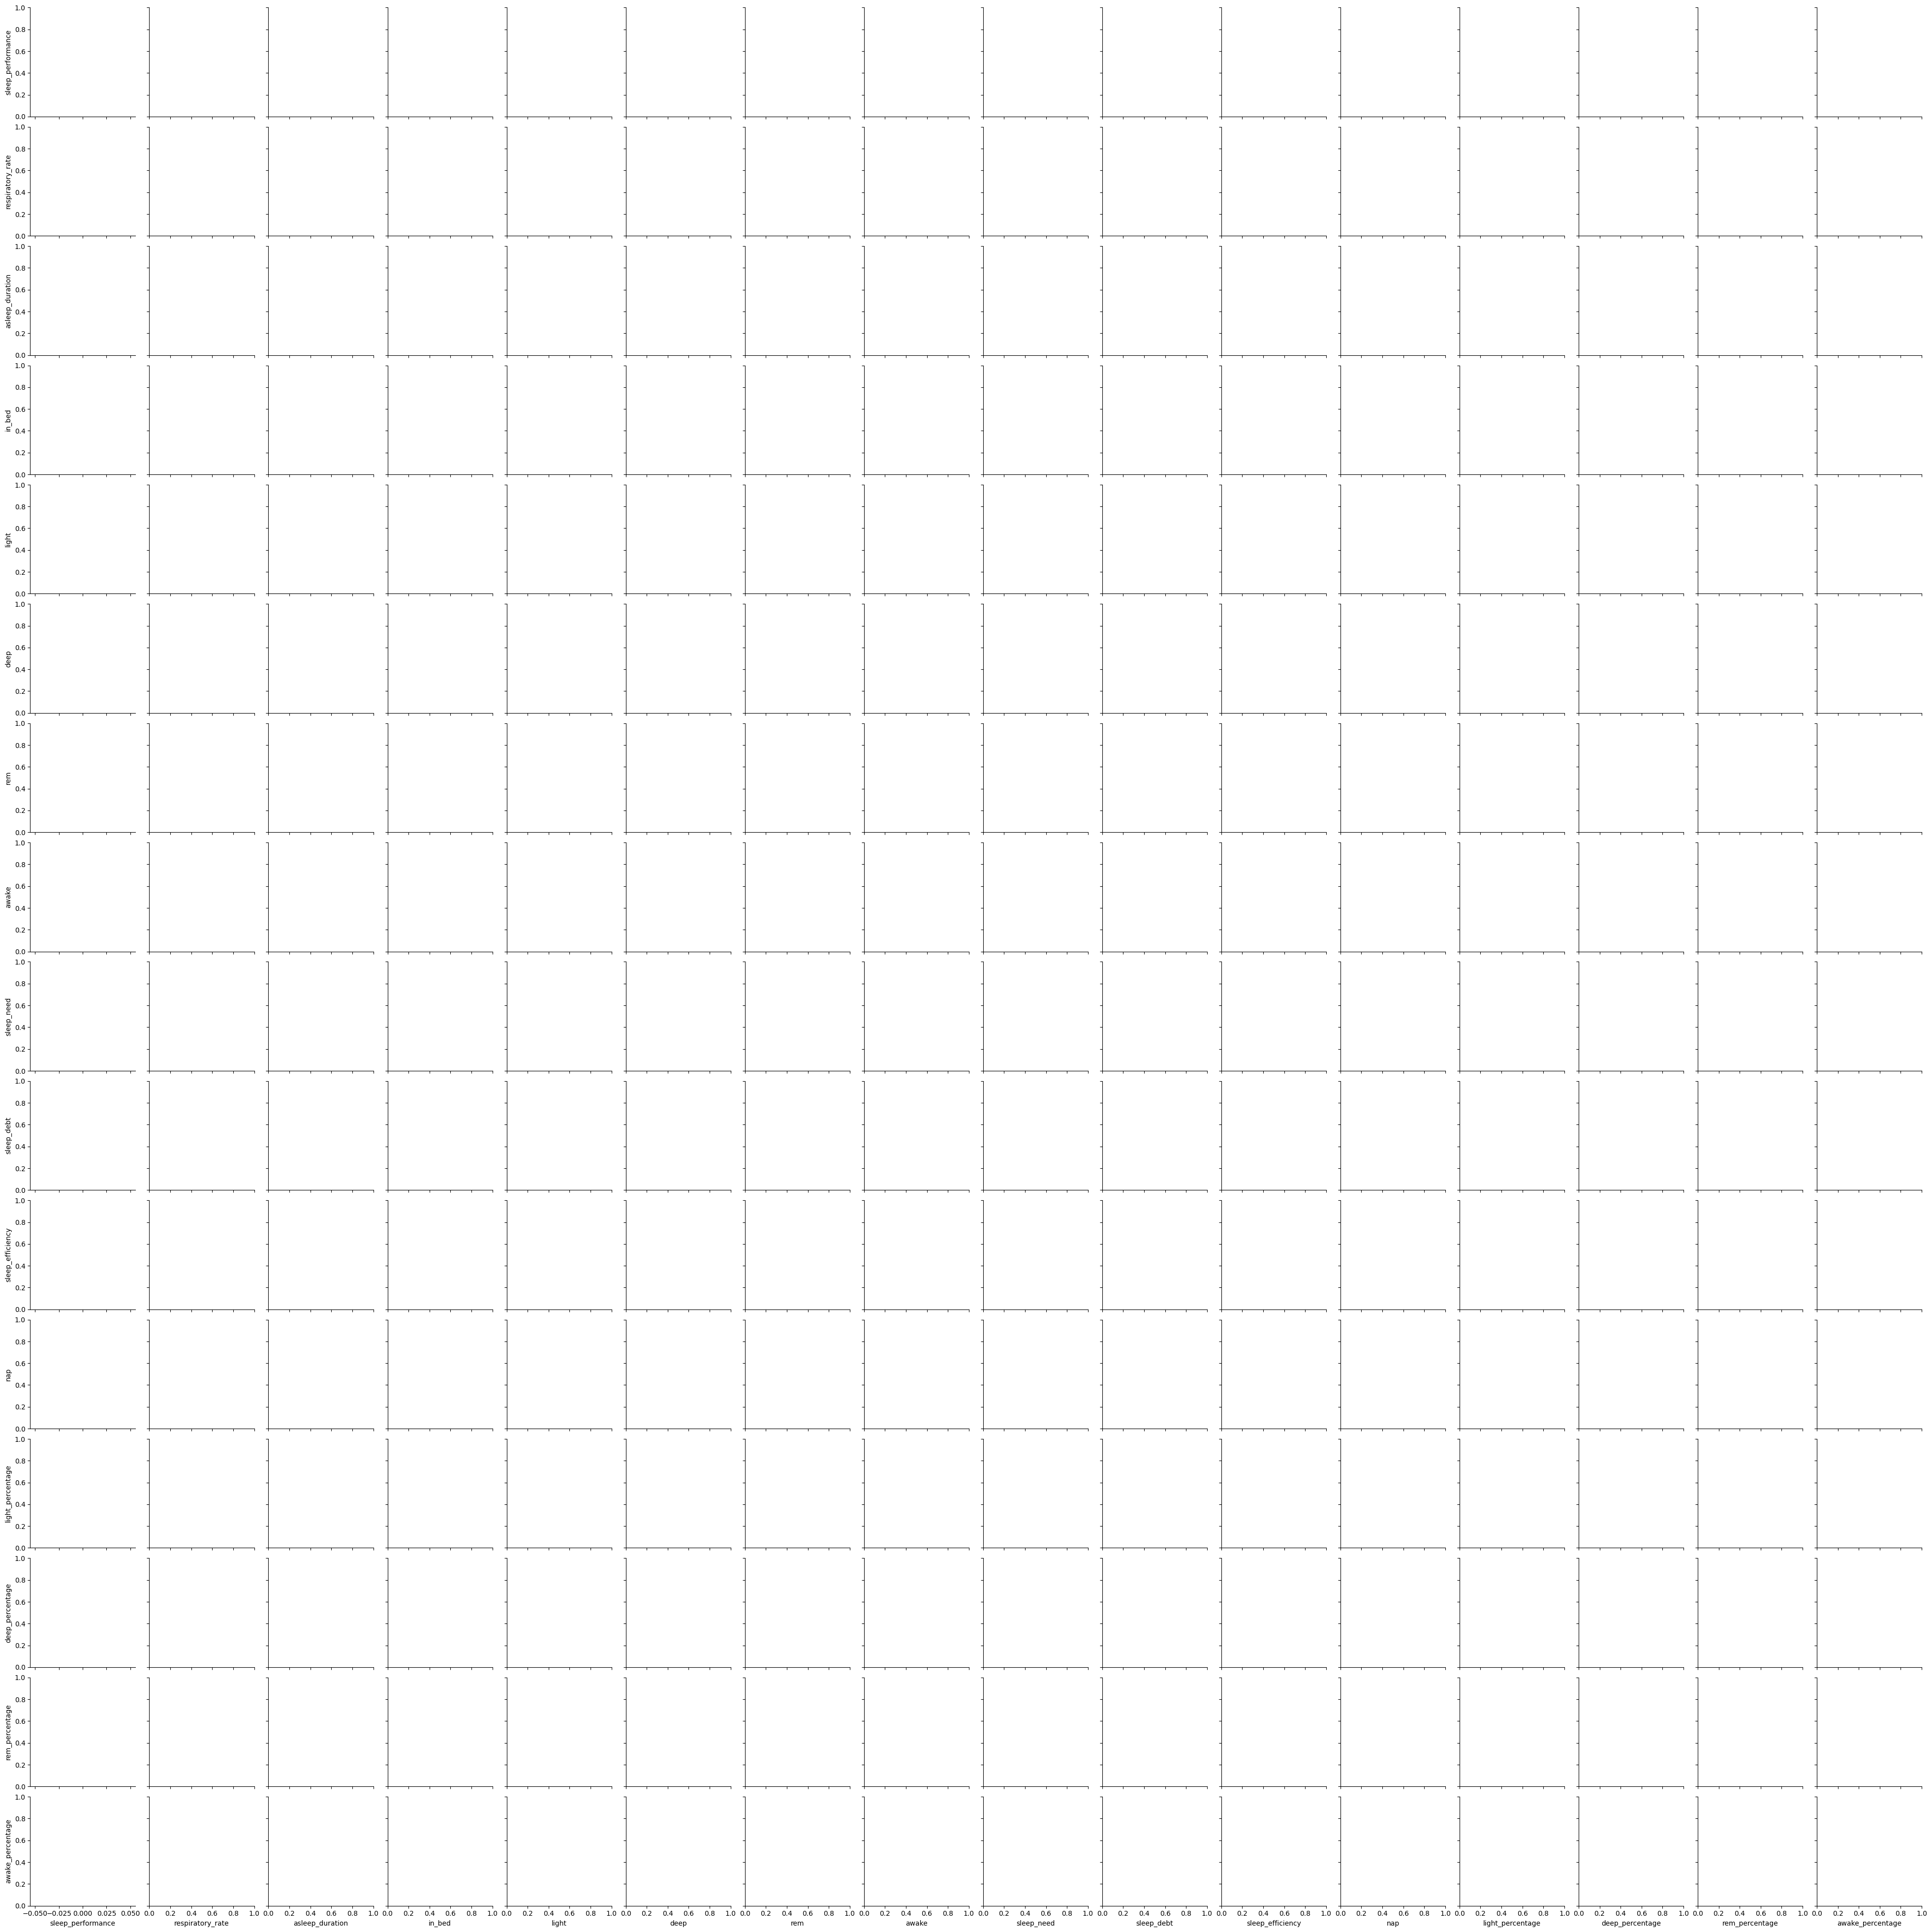

In [16]:
sns.pairplot(df)

/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_94015/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

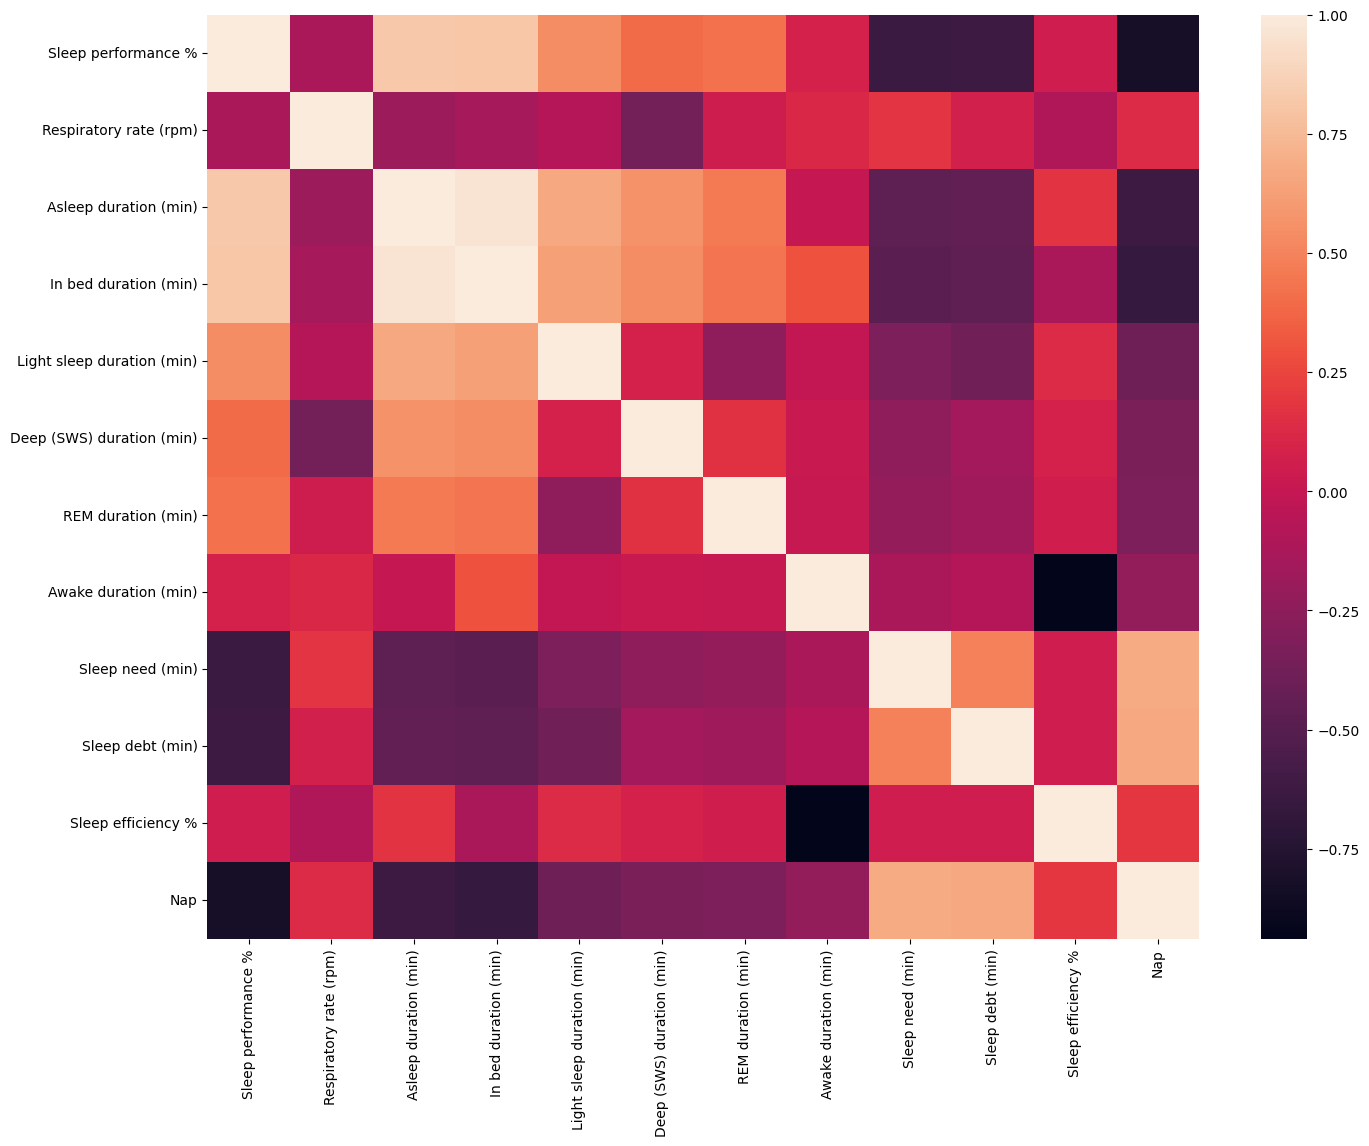

In [ ]:
sns.heatmap(df.corr())

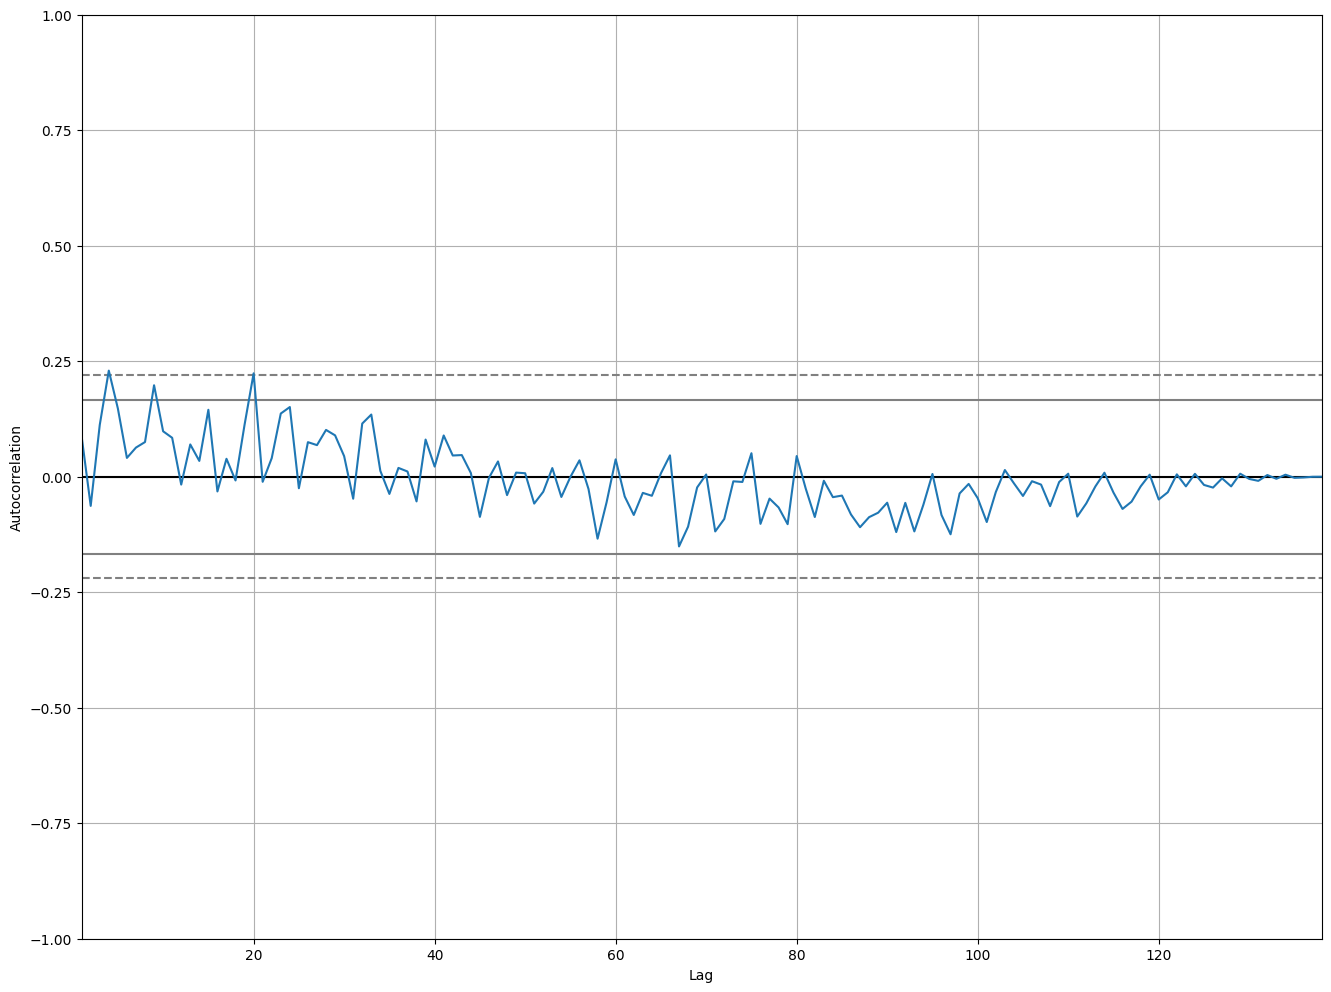

In [ ]:
autocorrelation_plot(df['deep'])
plt.show()

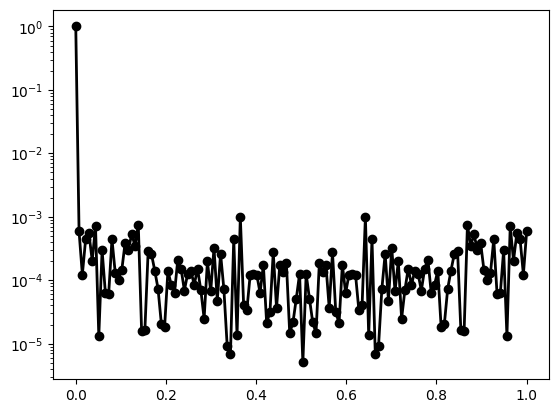

In [ ]:
fftPlot(df['light'].values)

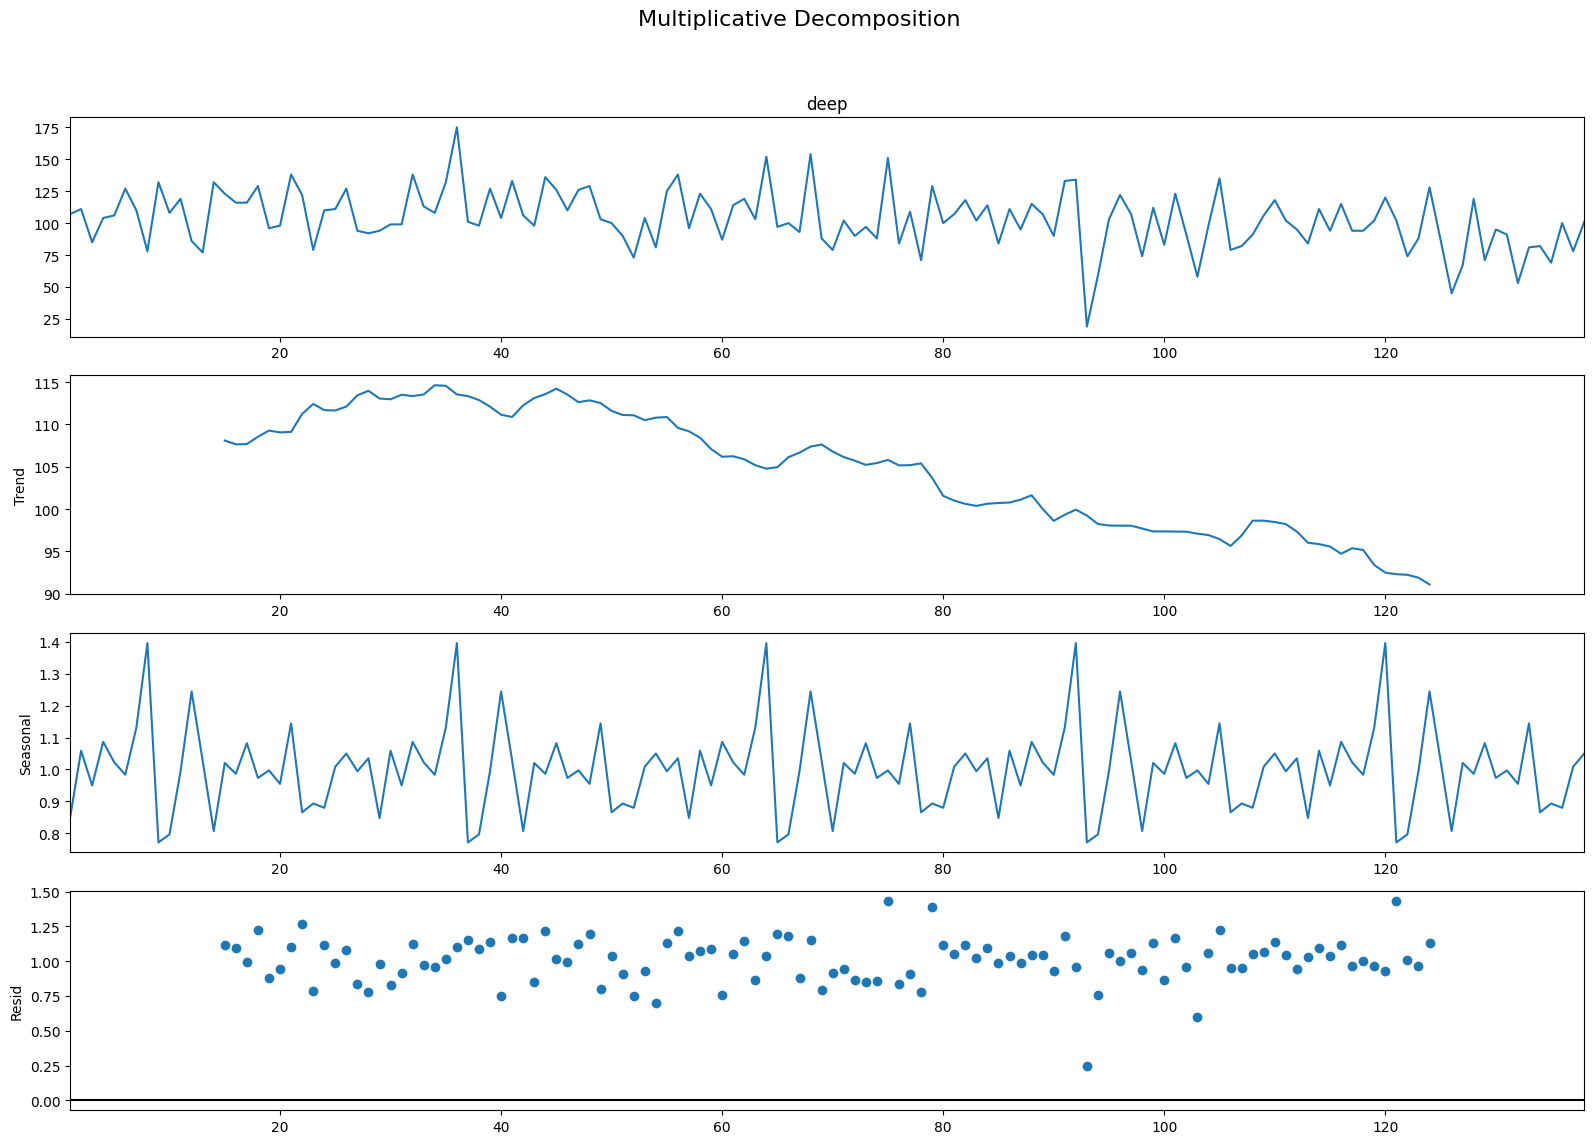

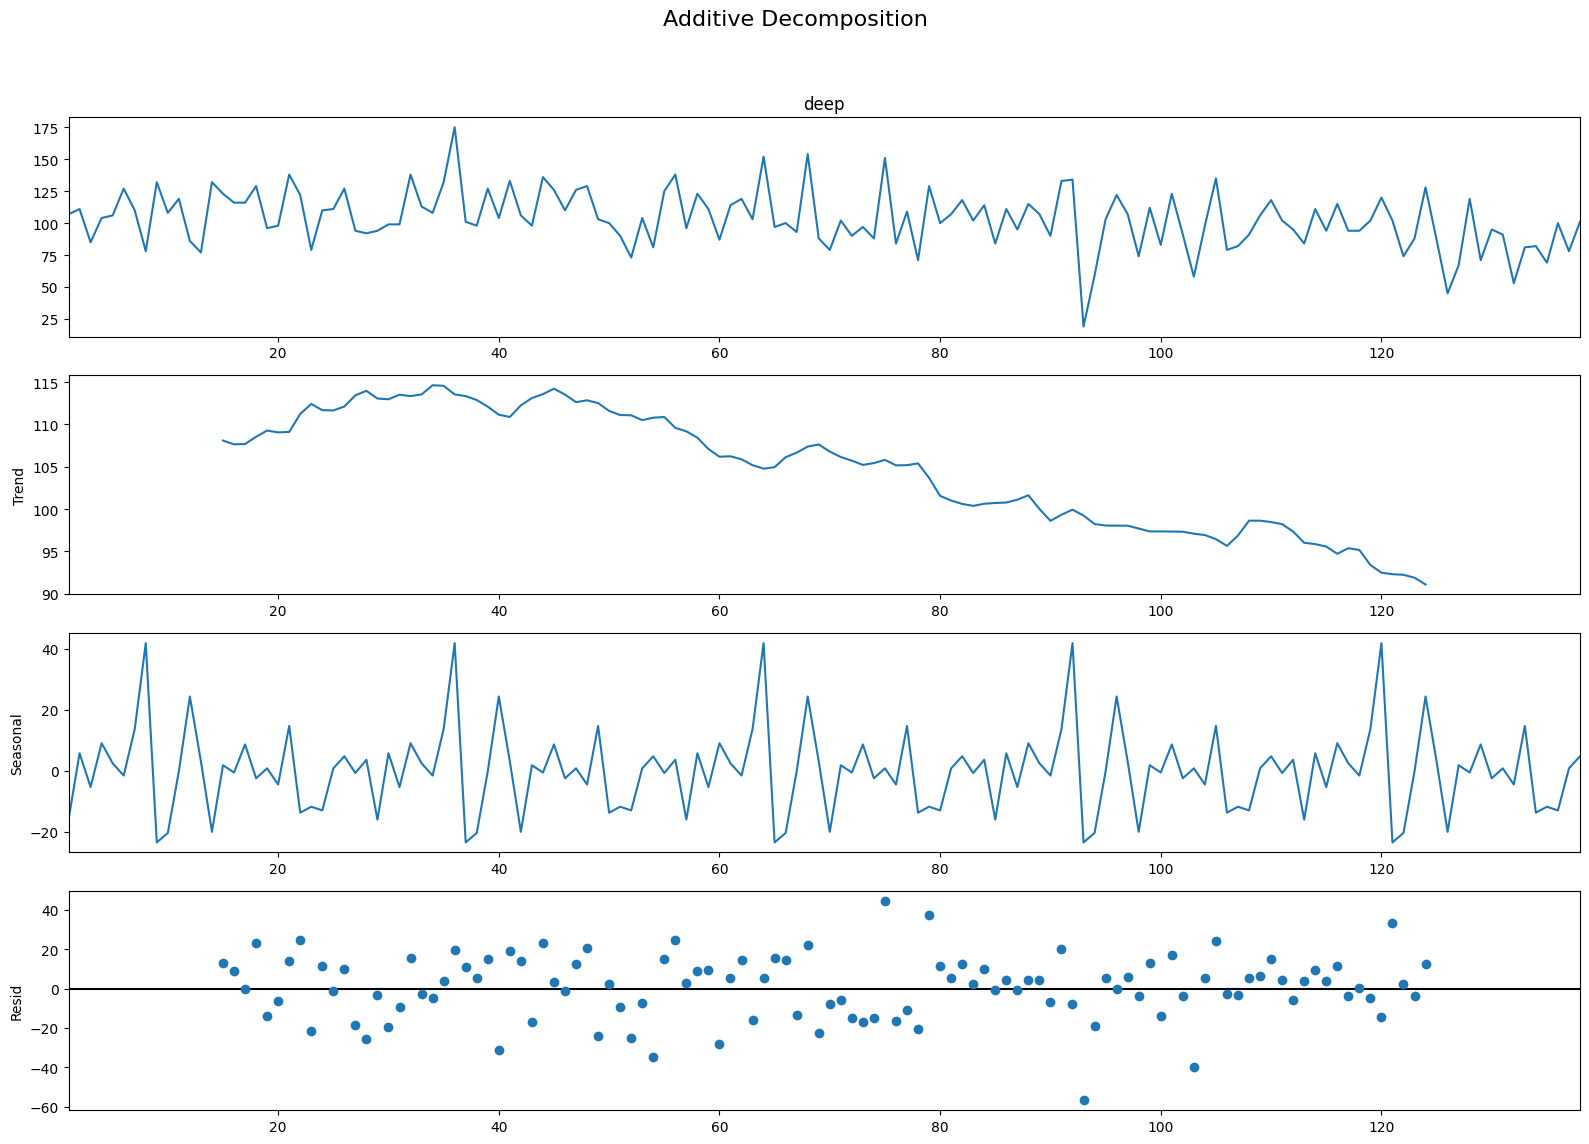

In [ ]:
decompPlot(df, 'deep')

Text(0.5, 0.98, 'asleep_duration')

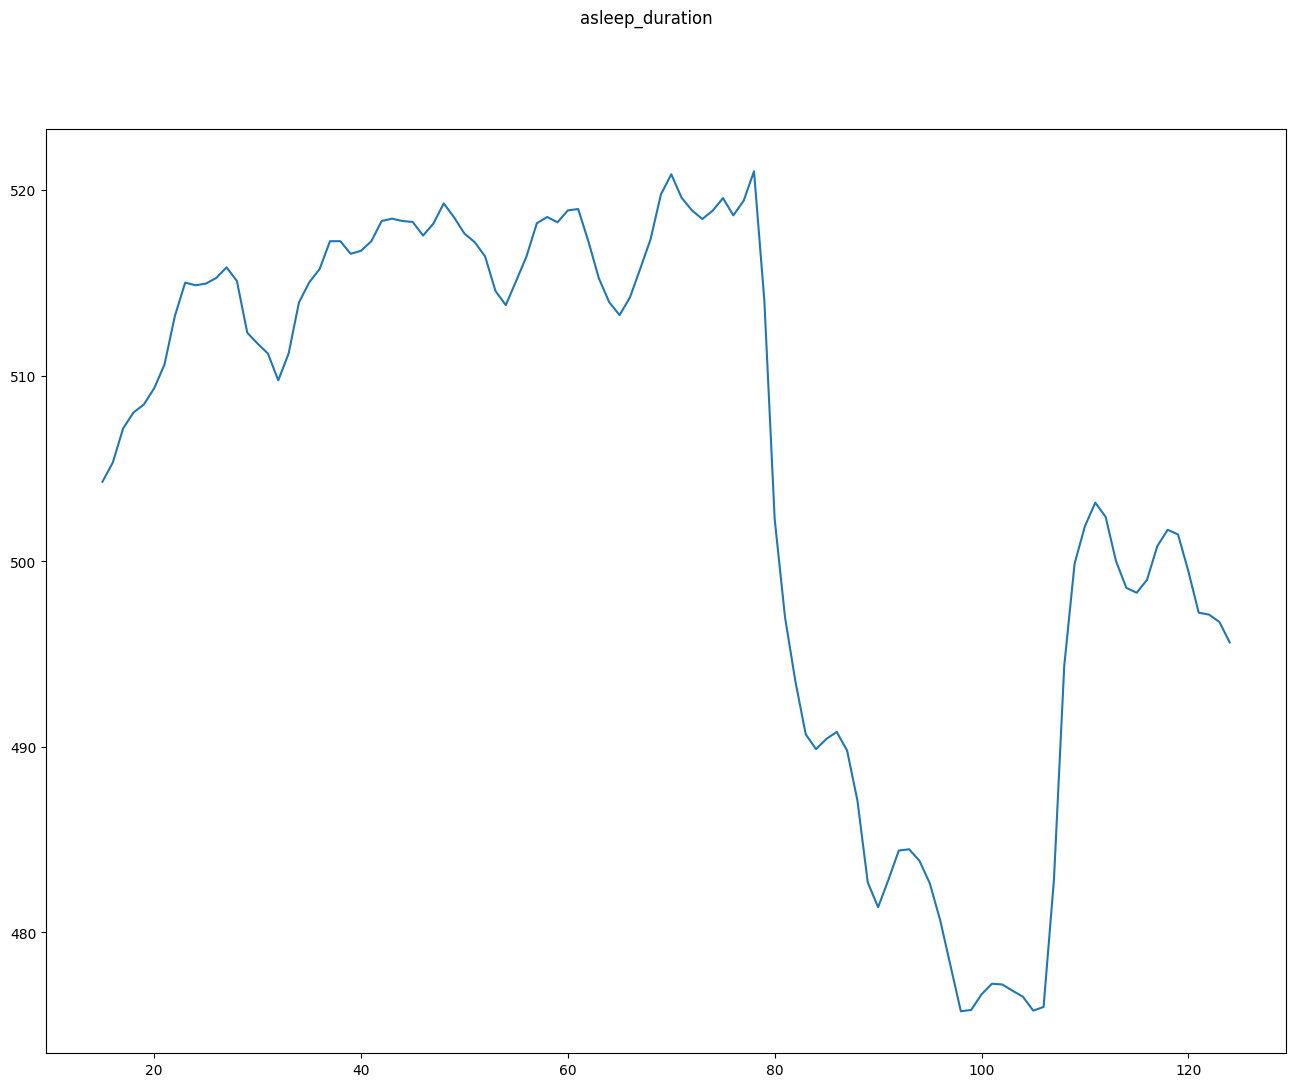

In [ ]:
DecomposeResults = seasonal_decompose(df['asleep_duration'], model='multiplicative', period=28)
plt.plot(DecomposeResults.trend)
plt.suptitle('asleep_duration')

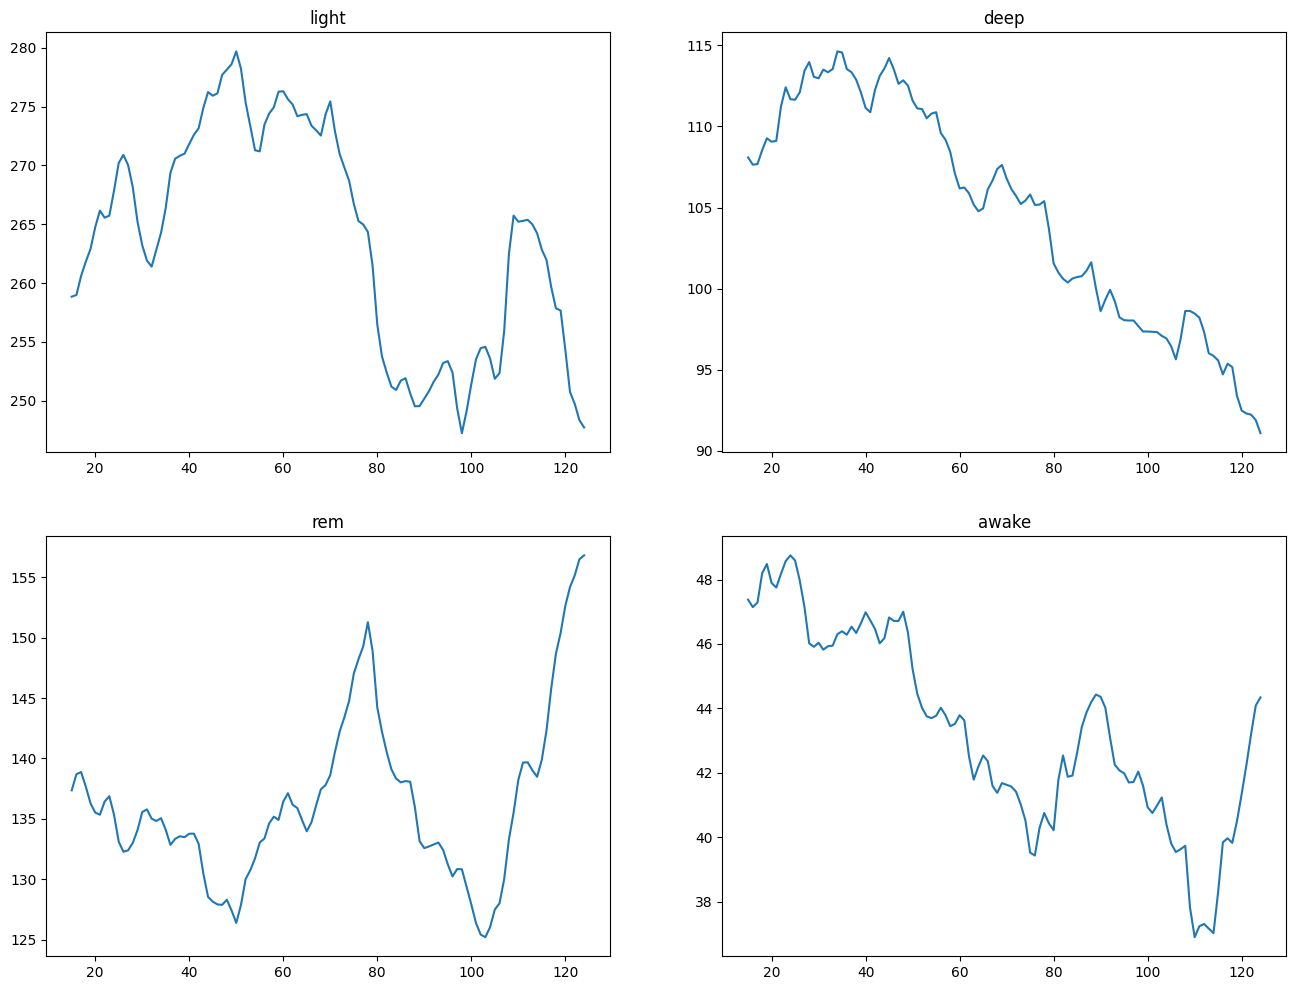

In [ ]:
sleepTrendPlot(df, df.columns[9:13])

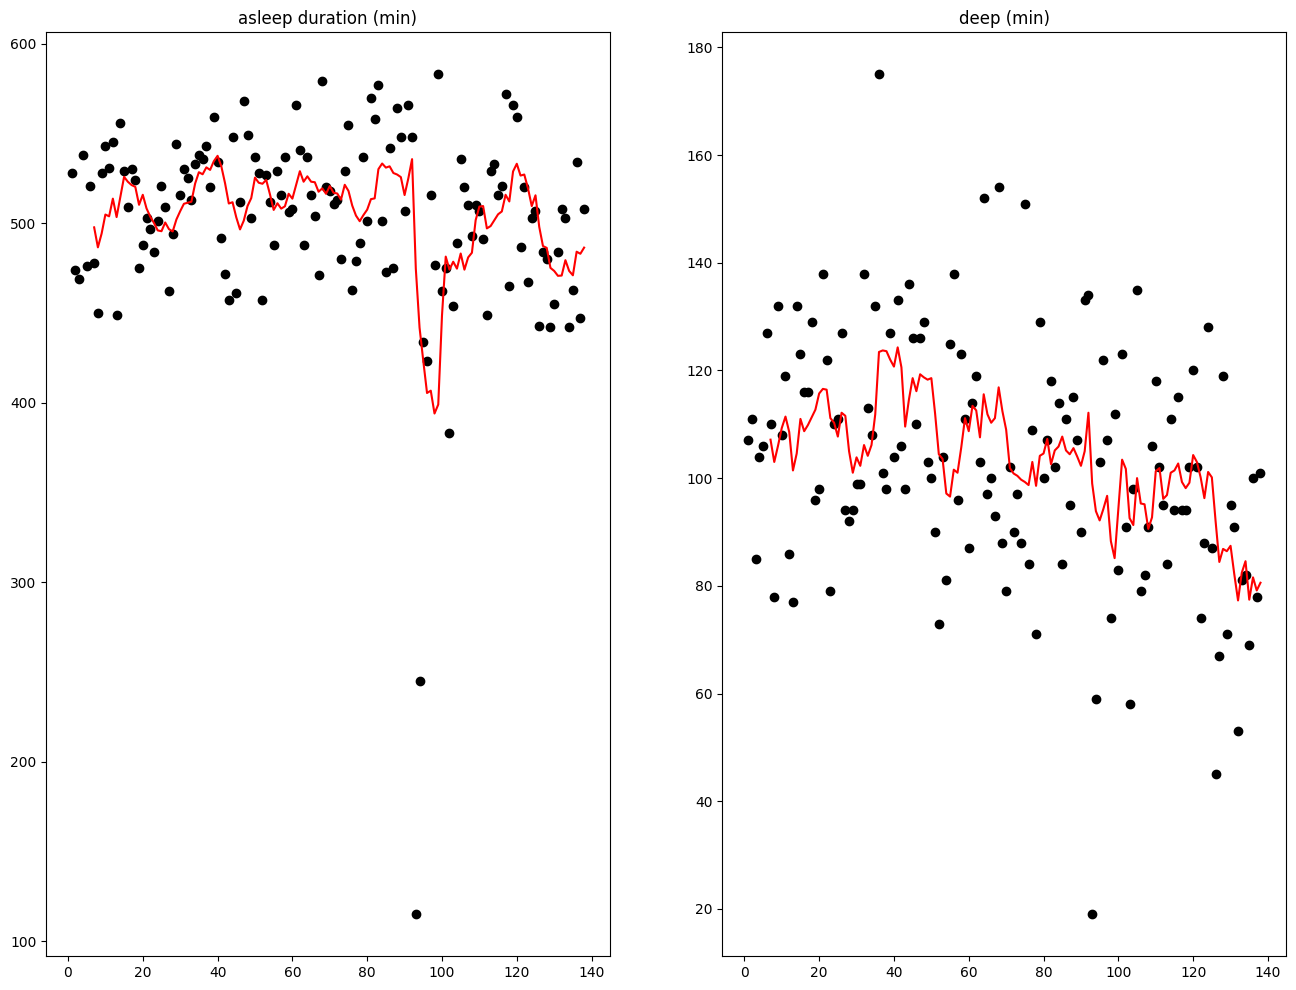

In [ ]:
plt.subplot(1, 2, 1)

plt.plot(df['asleep_duration'], 'ko', linestyle = 'none' )
plt.plot(df['asleep_duration'].rolling(window=7).mean(),color = 'r')
plt.title('asleep duration (min)')

plt.subplot(1, 2, 2)
plt.title('deep (min)')
plt.plot(df['deep'], 'ko', linestyle = 'none' )
plt.plot(df['deep'].rolling(window=7).mean(),color = 'r')

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   deep   No. Observations:                  138
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -619.536
Date:                Sat, 22 Apr 2023   AIC                           1251.072
Time:                        18:39:24   BIC                           1268.591
Sample:                             0   HQIC                          1258.191
                                - 138                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8865      0.081    -10.961      0.000      -1.045      -0.728
ar.L2         -0.8861      0.116     -7.635      0.000      -1.114      -0.659
ar.L3         -0.6718      0.126     -5.344      0.0

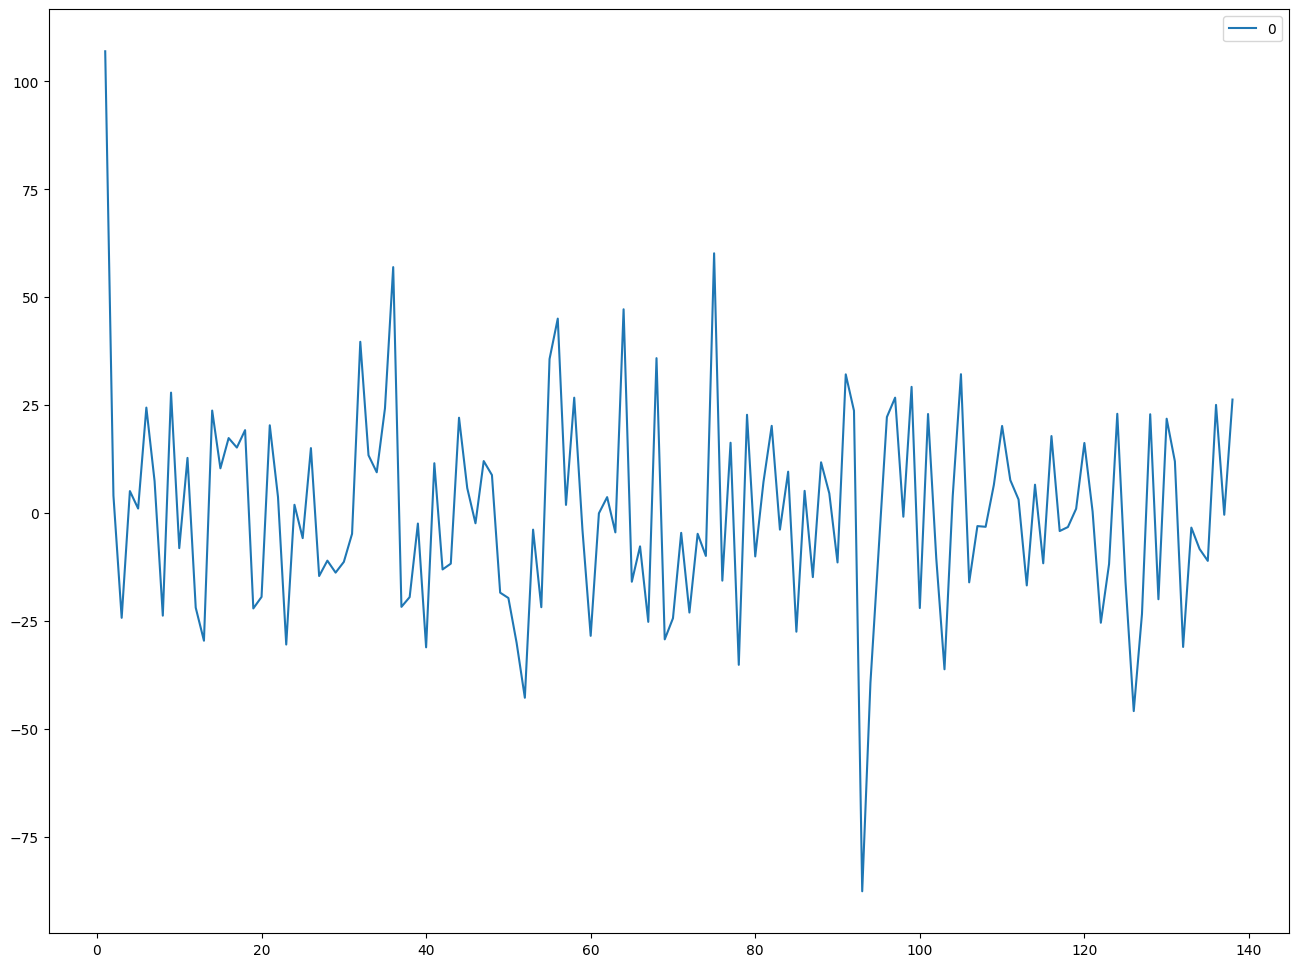

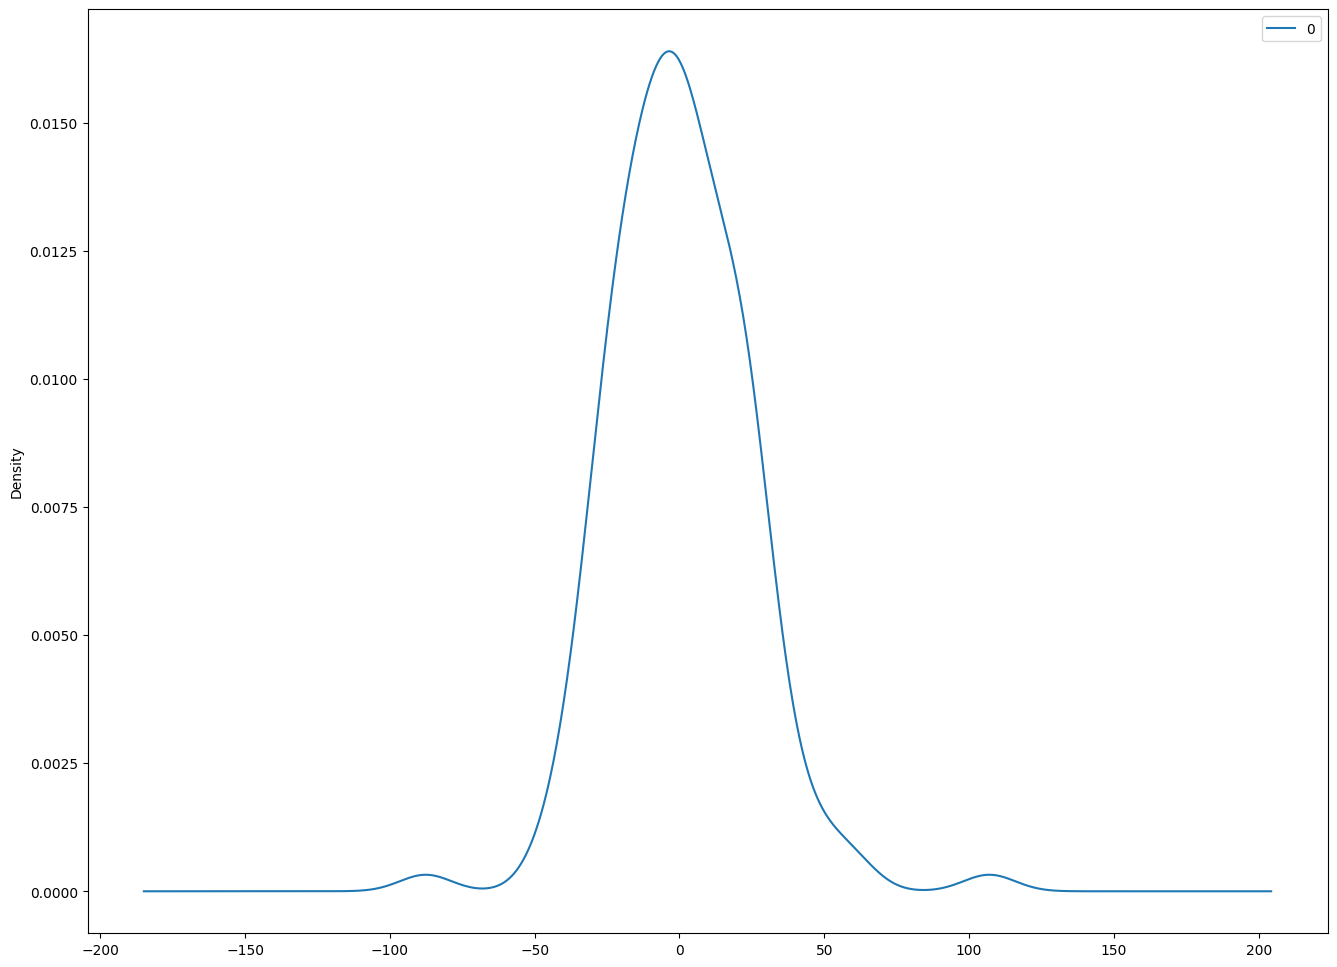

                0
count  138.000000
mean     0.278341
std     24.002005
min    -87.639527
25%    -15.847670
50%     -1.610855
75%     15.971659
max    107.000000


In [ ]:
# fit model
model = ARIMA(df['deep'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=107.235758, expected=134.000000
predicted=109.879572, expected=19.000000
predicted=107.895179, expected=59.000000
predicted=108.446728, expected=103.000000
predicted=92.309177, expected=122.000000
predicted=76.803966, expected=107.000000
predicted=78.912731, expected=74.000000
predicted=82.419630, expected=112.000000
predicted=105.534570, expected=83.000000
predicted=99.719116, expected=123.000000
predicted=99.969880, expected=91.000000
predicted=96.541955, expected=58.000000
predicted=93.785336, expected=98.000000
predicted=99.634264, expected=135.000000
predicted=96.314584, expected=79.000000
predicted=85.708340, expected=82.000000
predicted=94.200490, expected=91.000000
predicted=99.819497, expected=106.000000
predicted=97.191696, expected=118.000000
predicted=94.020611, expected=102.000000
predicted=92.652451, expected=95.000000
predicted=100.878005, expected=84.000000
predicted=104.117249, expected=111.000000
predicted=105.375689, expected=94.000000
predicted=97.425910, 

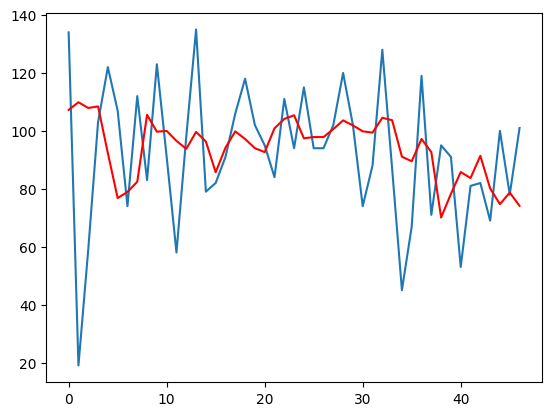

In [20]:
# split into train and test sets
X = df['deep'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mse(test, predictions))
print('Test RMSE: %.3f' % rmse)


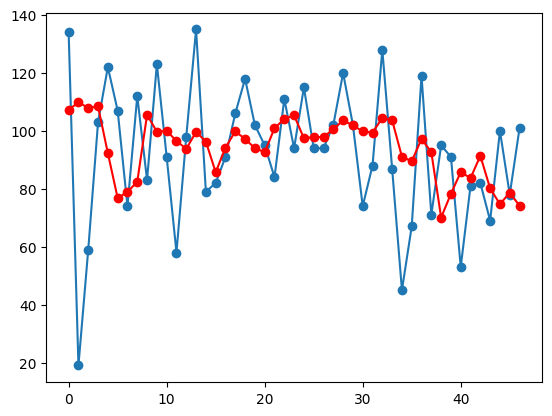

In [21]:
# plot forecasts against actual outcomes
plt.plot(test, marker='o')
plt.plot(predictions, color='red',marker='o')
plt.show()